In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd 'drive/My Drive/Siamese/Identification'

/content/drive/My Drive/Siamese/Identification


In [3]:
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '../Data')
sys.path.insert(0, '../Encoder')

In [4]:
!pip install torchaudio

     |████████████████████████████████| 6.7MB 2.6MB/s 


In [5]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

In [6]:
DATASET_PATH = '/content/drive/My Drive/DataSet'
EPOCH_NUM = 10

torch.backends.cudnn.deterministic = True

NUM_WORKERS = 4

In [7]:
from IdentificationDataset import IdentificationDataset
from IdentificationDataset import ReturnType
from torchvision.transforms import Compose

from Normalize import Normalize
from ToTensor import ToTensor

DATASET_PATH = '/content/drive/My Drive/DataSet'

transforms = Compose([
    Normalize(),
    ToTensor()
])

NUM_CLASSES = 20

trainset = IdentificationDataset(DATASET_PATH, 
                                 NUM_CLASSES,
                                 encode=False,
                                 train=True, 
                                 transform=transforms,
                                 lenght=3,
                                 return_type=ReturnType.STANDARD)
trainsetloader = torch.utils.data.DataLoader(trainset, 
                                             batch_size=1, 
                                             num_workers=NUM_WORKERS, 
                                             shuffle=True)

testset = IdentificationDataset(DATASET_PATH, 
                                NUM_CLASSES,
                                encode=False,
                                train=False, 
                                transform=transforms,
                                lenght=3,
                                return_type=ReturnType.STANDARD)

testsetloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=1, 
                                            num_workers=NUM_WORKERS)

print("lenght test loader ", len(testsetloader))


sample lenght  3
sample lenght  3
lenght test loader  258


In [8]:
from Conference import Conference

# Define default device, we should use the GPU (cuda) if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Conference(DEVICE, time=False)
net.to(DEVICE)

Conference(
  (encoder): TransFourier(
    (spectrogram): Spectrogram()
    (amp): AmplitudeToDB()
    (block1): Conv2DBlock(
      (conv1): Conv2d(1, 32, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 1), padding=(3, 3))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 4), stride=(4, 4), padding=0, dilation=1, ceil_mode=False)
    )
    (block2): Conv2DBlock(
      (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(128, 192, kernel_size=(5, 5), stride=(2, 1), padding=(2, 2))
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 2), stride=(4, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block3): Conv2DBlock(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Co

In [9]:
with torch.no_grad():
  # test
  net.eval()
  # Store the places
  speakers_list = testset.get_speakers_list(20)
  net.load_encoder()
  net.initspeakers(speakers_list)  
  net.initplaces(speakers_list, maxsize=3)

Encoder loaded


*** Epoch  0  ***
*** Train ***


1876it [05:08,  6.09it/s]

accuracy mean  0.2579957356076759 topk 0.5959488272921108  min  0.593816631130064
Error  0.40405117270788915
{270: 16, 272: 97, 273: 27, 274: 32, 275: 29, 276: 45, 277: 57, 278: 13, 271: 93, 279: 76, 280: 86, 281: 76, 282: 14, 283: 44, 285: 75, 284: 22, 286: 21, 287: 71, 288: 66, 289: 5}
*** Test ***



258it [00:29,  8.67it/s]


accuracy final_mean  0.9844961240310077  final_min  0.9689922480620154


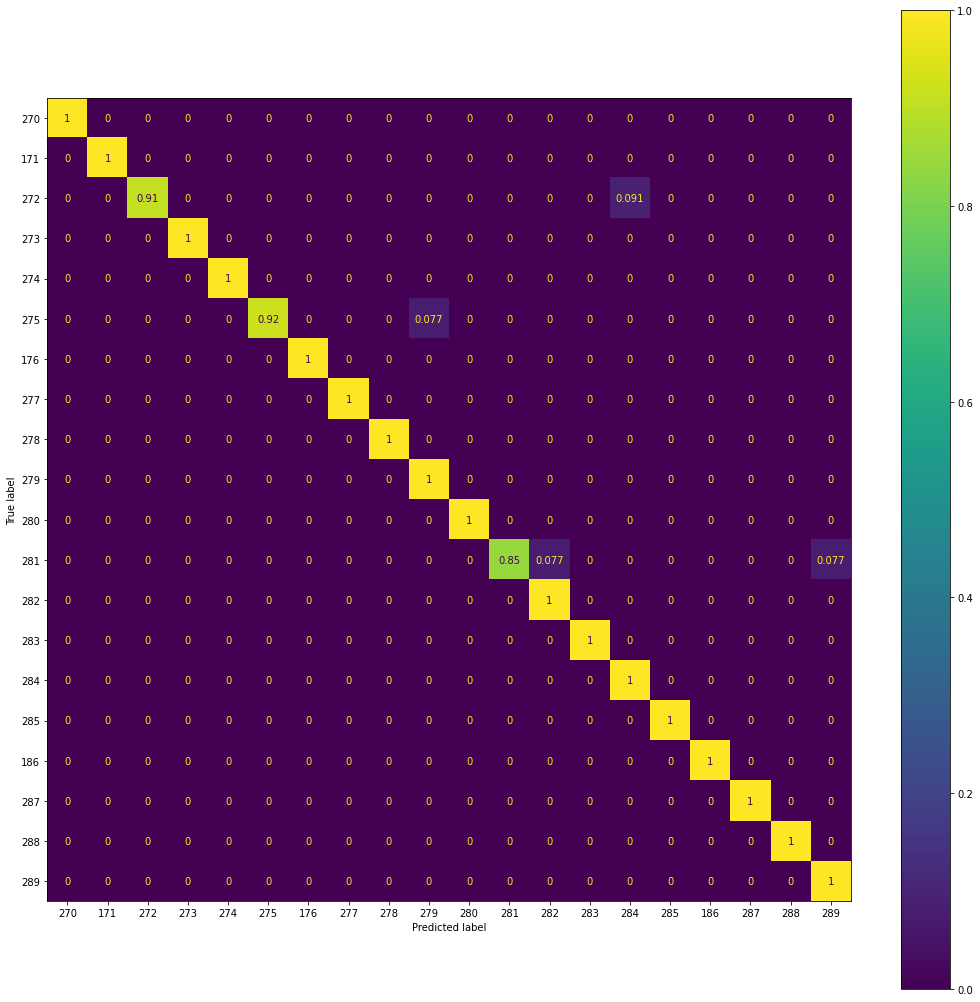

*** Epoch  1  ***
*** Train ***


1876it [00:33, 56.84it/s]

accuracy mean  0.5788912579957356 topk 0.7372068230277186  min  0.7286780383795309
Error  0.26279317697228144
{270: 19, 272: 76, 273: 30, 274: 22, 275: 18, 276: 23, 277: 27, 278: 6, 271: 34, 279: 39, 280: 38, 281: 43, 282: 22, 283: 29, 285: 59, 284: 4, 286: 6, 287: 44, 288: 50, 289: 16}
*** Test ***



258it [00:03, 70.60it/s]


accuracy final_mean  0.9883720930232558  final_min  0.9728682170542635


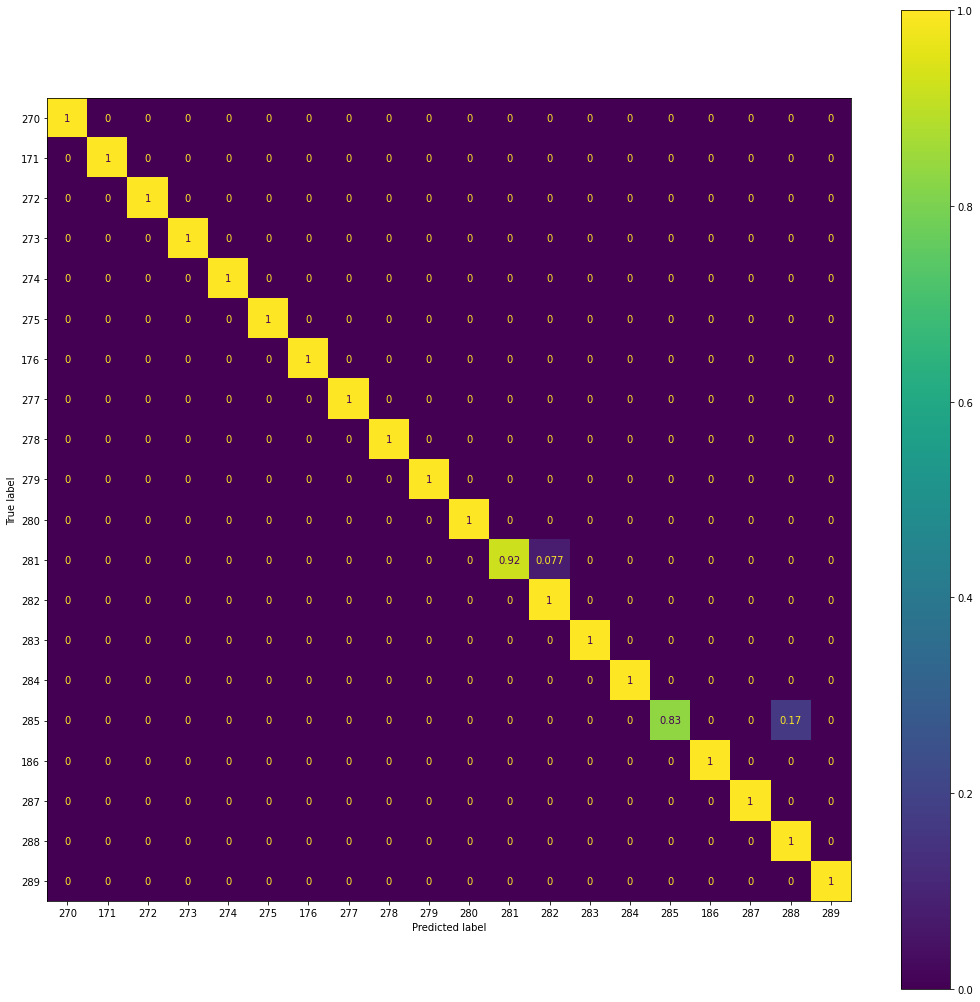

*** Epoch  2  ***
*** Train ***


1876it [00:32, 57.10it/s]

accuracy mean  0.6513859275053305 topk 0.753731343283582  min  0.7531982942430704
Error  0.2462686567164179
{270: 22, 272: 51, 273: 31, 274: 10, 275: 13, 276: 25, 277: 14, 278: 7, 271: 21, 279: 21, 280: 32, 281: 26, 282: 20, 283: 35, 285: 58, 284: 5, 286: 8, 287: 50, 288: 38, 289: 16}
*** Test ***



258it [00:03, 70.91it/s]


accuracy final_mean  0.9844961240310077  final_min  0.9651162790697675


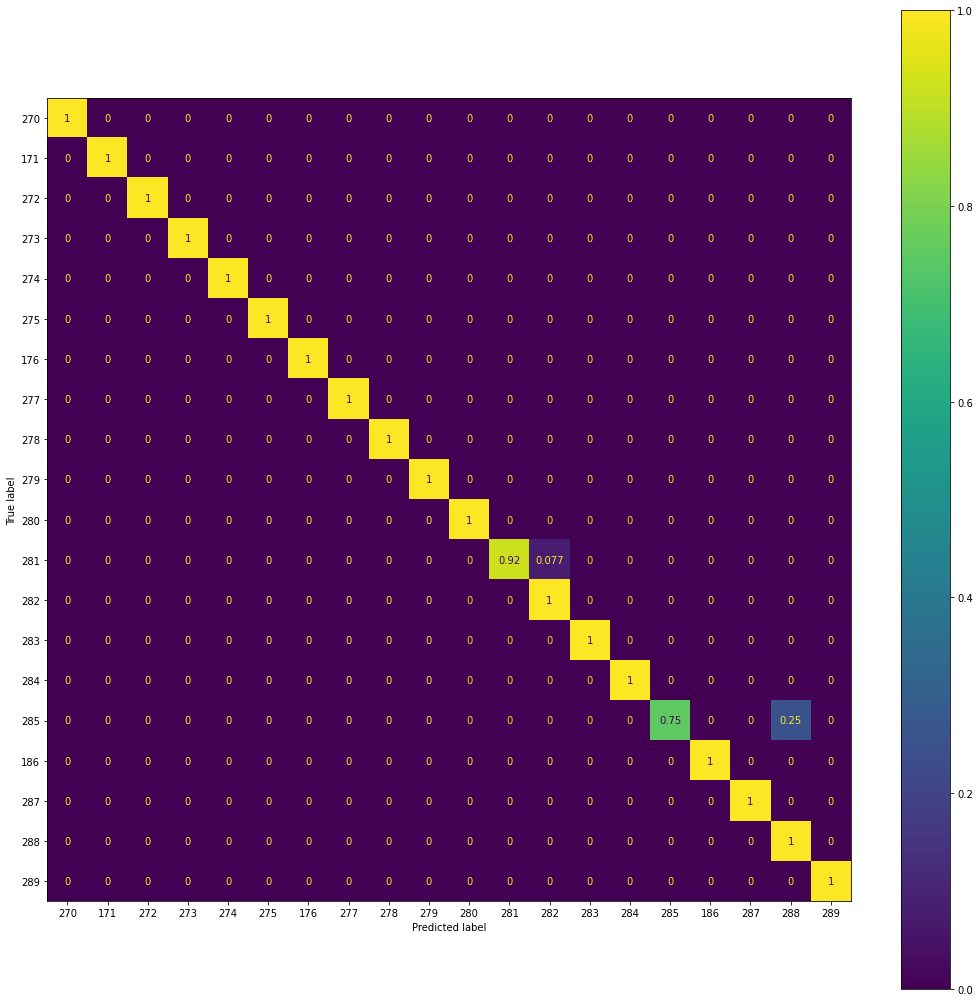

*** Epoch  3  ***
*** Train ***


1876it [00:32, 57.04it/s]

accuracy mean  0.6860341151385928 topk 0.7531982942430704  min  0.7563965884861408
Error  0.24680170575692964
{270: 23, 272: 35, 273: 39, 274: 12, 275: 21, 276: 20, 277: 11, 278: 8, 271: 13, 279: 15, 280: 26, 281: 38, 282: 25, 283: 38, 285: 50, 284: 2, 286: 5, 287: 52, 288: 16, 289: 21}
*** Test ***



258it [00:03, 71.25it/s]


accuracy final_mean  0.9767441860465116  final_min  0.9573643410852714


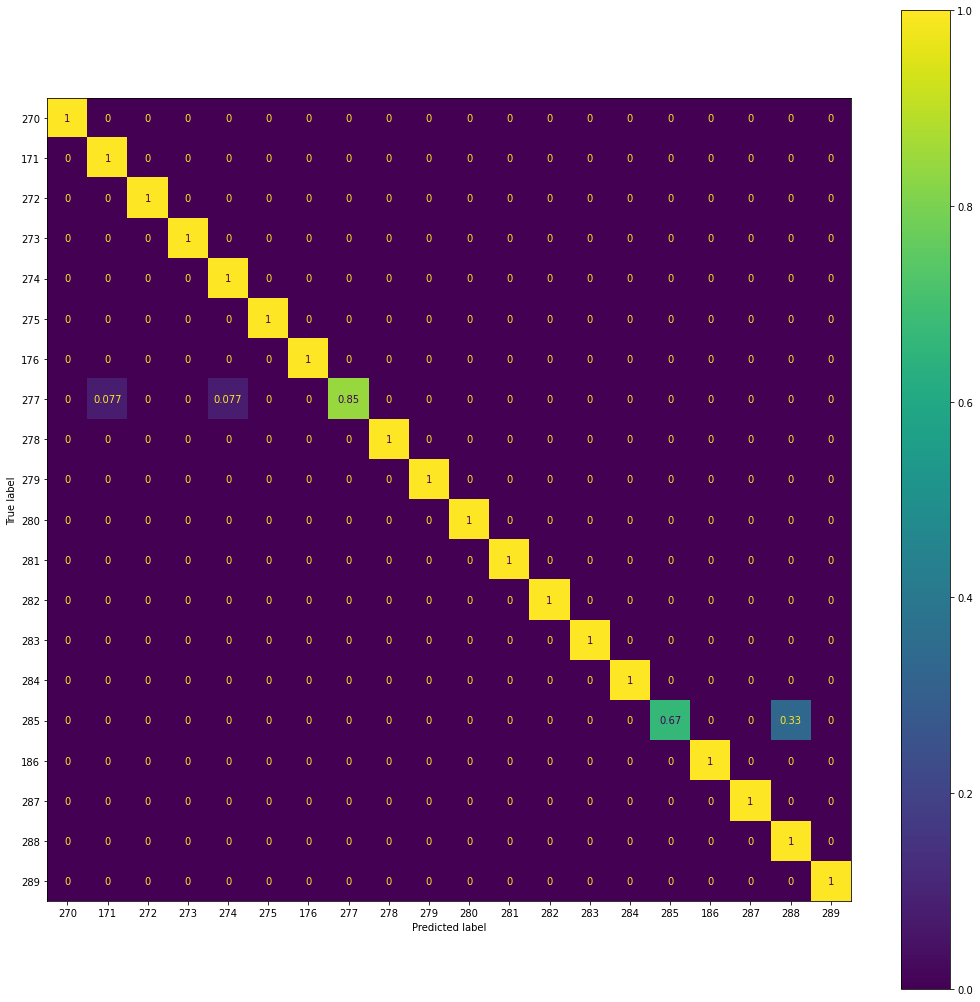

*** Epoch  4  ***
*** Train ***


1876it [00:32, 56.96it/s]

accuracy mean  0.7110874200426439 topk 0.7659914712153518  min  0.7526652452025586
Error  0.2340085287846482
{270: 23, 272: 28, 273: 38, 274: 10, 275: 19, 276: 14, 277: 9, 278: 7, 271: 11, 279: 15, 280: 25, 281: 32, 282: 18, 283: 42, 285: 48, 284: 5, 286: 6, 287: 42, 288: 11, 289: 24}
*** Test ***



258it [00:03, 69.55it/s]


accuracy final_mean  0.9689922480620154  final_min  0.9534883720930233


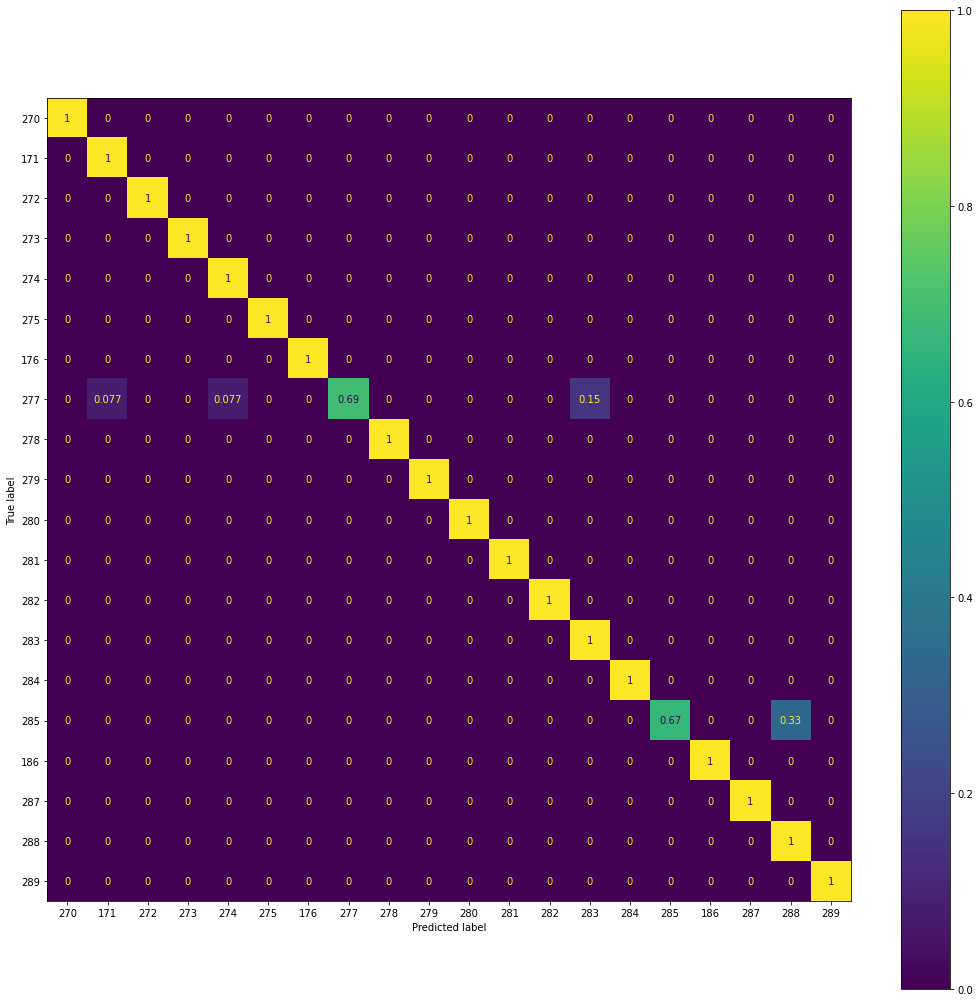

*** Epoch  5  ***
*** Train ***


1876it [00:33, 56.78it/s]

accuracy mean  0.6988272921108742 topk 0.761727078891258  min  0.753731343283582
Error  0.23827292110874201
{270: 29, 272: 25, 273: 35, 274: 7, 275: 14, 276: 16, 277: 11, 278: 9, 271: 14, 279: 13, 280: 23, 281: 30, 282: 20, 283: 43, 285: 49, 284: 4, 286: 7, 287: 44, 288: 8, 289: 24}
*** Test ***



258it [00:03, 70.41it/s]


accuracy final_mean  0.9689922480620154  final_min  0.9457364341085271


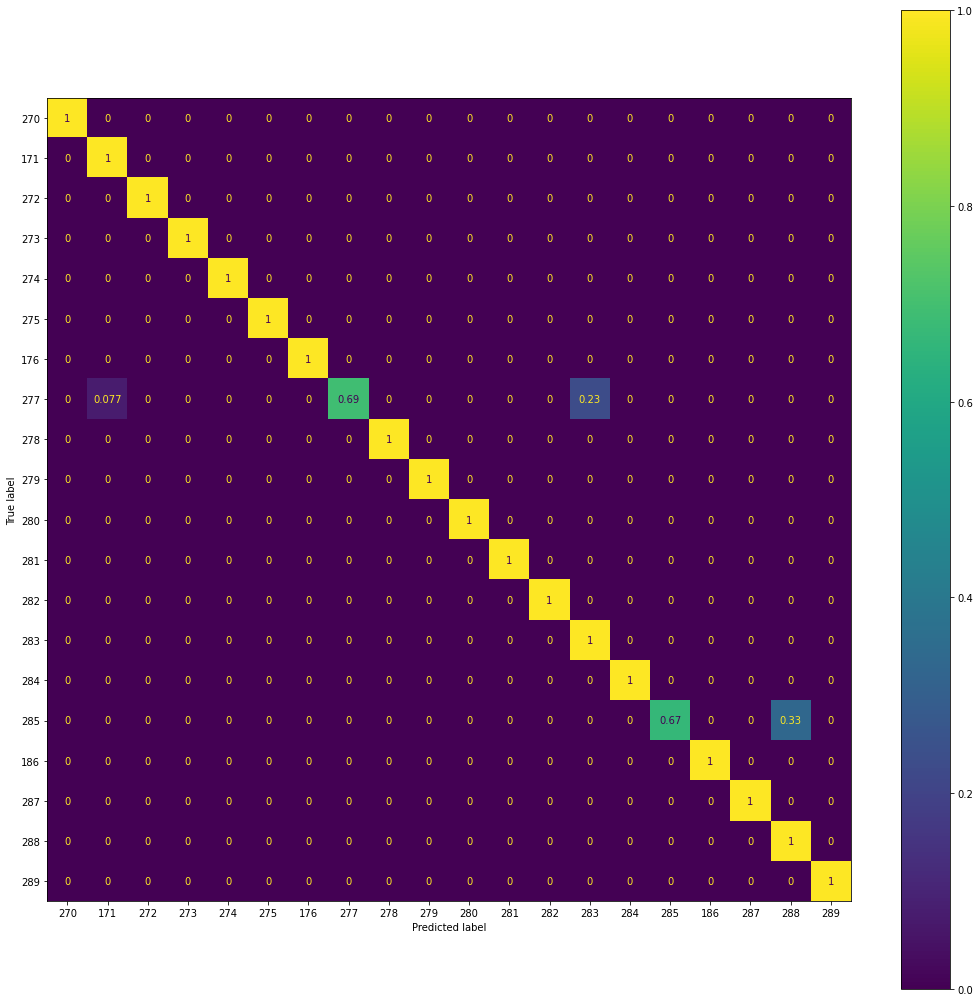

*** Epoch  6  ***
*** Train ***


1876it [00:32, 56.99it/s]

accuracy mean  0.7105543710021321 topk 0.7590618336886994  min  0.7553304904051172
Error  0.24093816631130063
{270: 23, 272: 23, 273: 37, 274: 7, 275: 21, 276: 17, 277: 9, 278: 11, 271: 14, 279: 9, 280: 25, 281: 38, 282: 16, 283: 44, 285: 46, 284: 6, 286: 7, 287: 44, 288: 11, 289: 21}
*** Test ***



258it [00:03, 66.97it/s]


accuracy final_mean  0.9689922480620154  final_min  0.9534883720930233


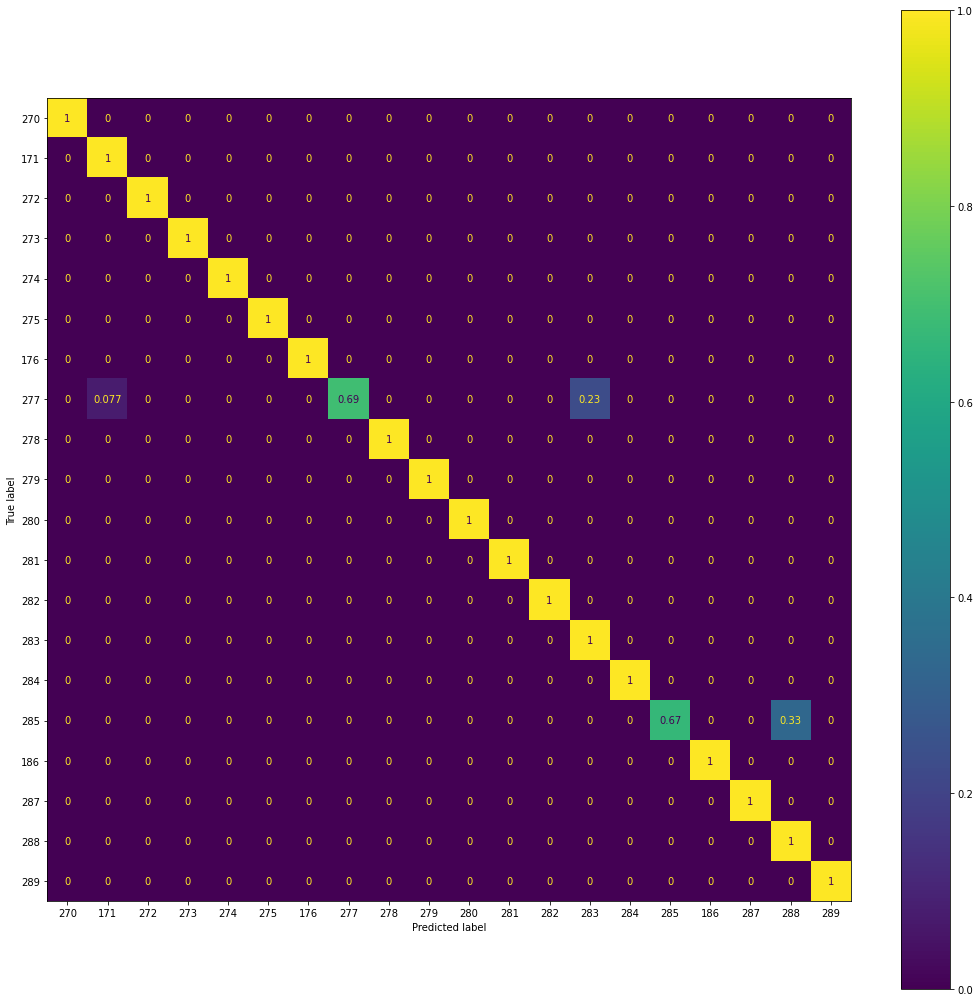

*** Epoch  7  ***
*** Train ***


1876it [00:33, 56.61it/s]

accuracy mean  0.7046908315565032 topk 0.7526652452025586  min  0.7350746268656716
Error  0.24733475479744135
{270: 28, 272: 23, 273: 37, 274: 7, 275: 19, 276: 19, 277: 9, 278: 9, 271: 13, 279: 9, 280: 30, 281: 35, 282: 21, 283: 45, 285: 49, 284: 1, 286: 6, 287: 50, 288: 8, 289: 23}
*** Test ***



258it [00:03, 71.02it/s]


accuracy final_mean  0.9573643410852714  final_min  0.9573643410852714


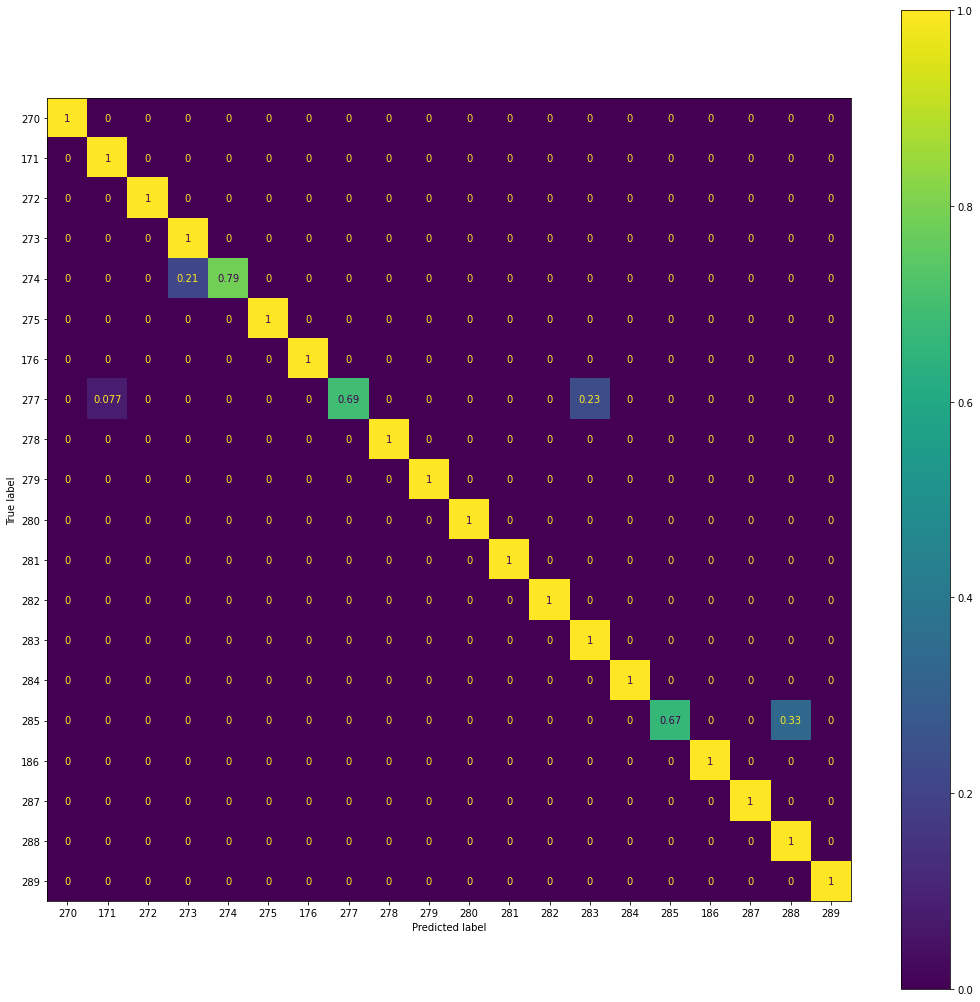

*** Epoch  8  ***
*** Train ***


1876it [00:32, 57.19it/s]

accuracy mean  0.7244136460554371 topk 0.7606609808102346  min  0.7515991471215352
Error  0.23933901918976547
{270: 25, 272: 23, 273: 37, 274: 5, 275: 19, 276: 16, 277: 12, 278: 8, 271: 13, 279: 7, 280: 26, 281: 32, 282: 20, 283: 47, 285: 50, 284: 4, 286: 5, 287: 42, 288: 11, 289: 21}
*** Test ***



258it [00:03, 72.31it/s]


accuracy final_mean  0.9534883720930233  final_min  0.9534883720930233


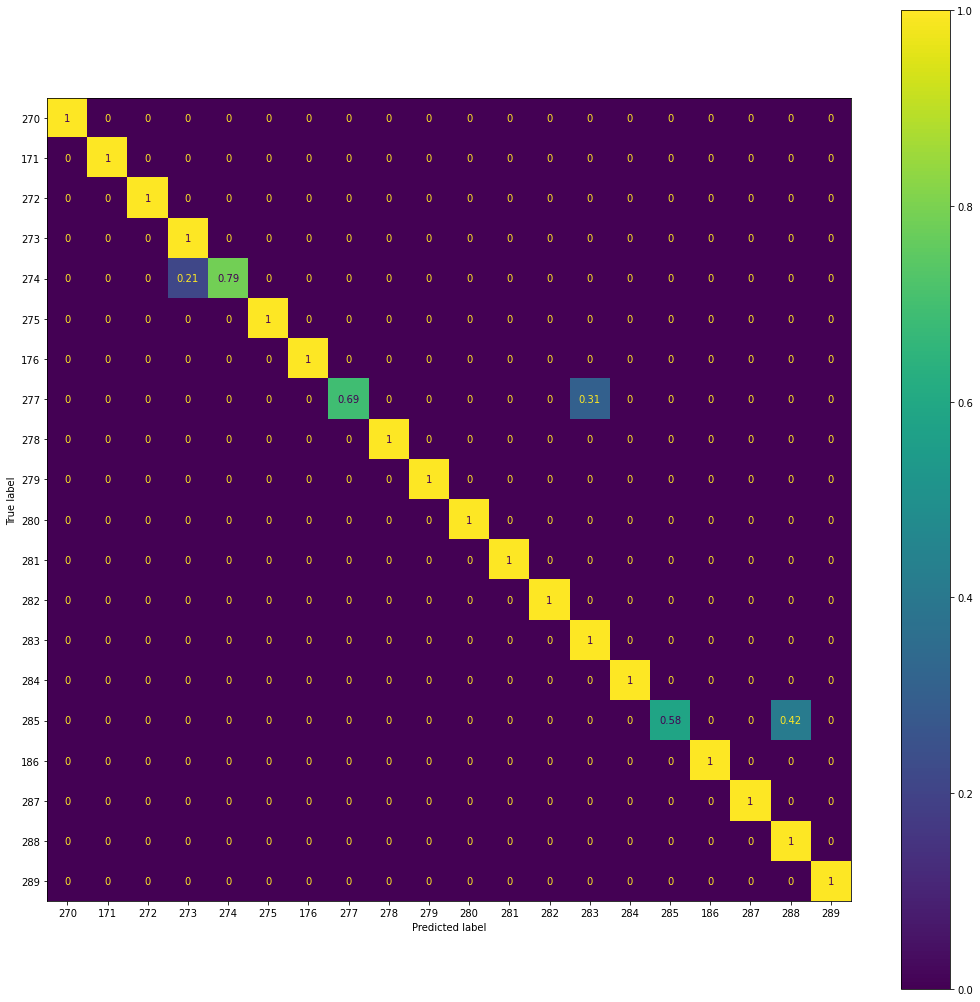

*** Epoch  9  ***
*** Train ***


1876it [00:32, 57.91it/s]

accuracy mean  0.7084221748400853 topk 0.7526652452025586  min  0.7452025586353944
Error  0.24733475479744135
{270: 23, 272: 23, 273: 40, 274: 7, 275: 22, 276: 18, 277: 12, 278: 10, 271: 16, 279: 17, 280: 26, 281: 35, 282: 18, 283: 39, 285: 53, 284: 4, 286: 7, 287: 42, 288: 11, 289: 27}
*** Test ***



258it [00:03, 72.61it/s]


accuracy final_mean  0.9534883720930233  final_min  0.9457364341085271


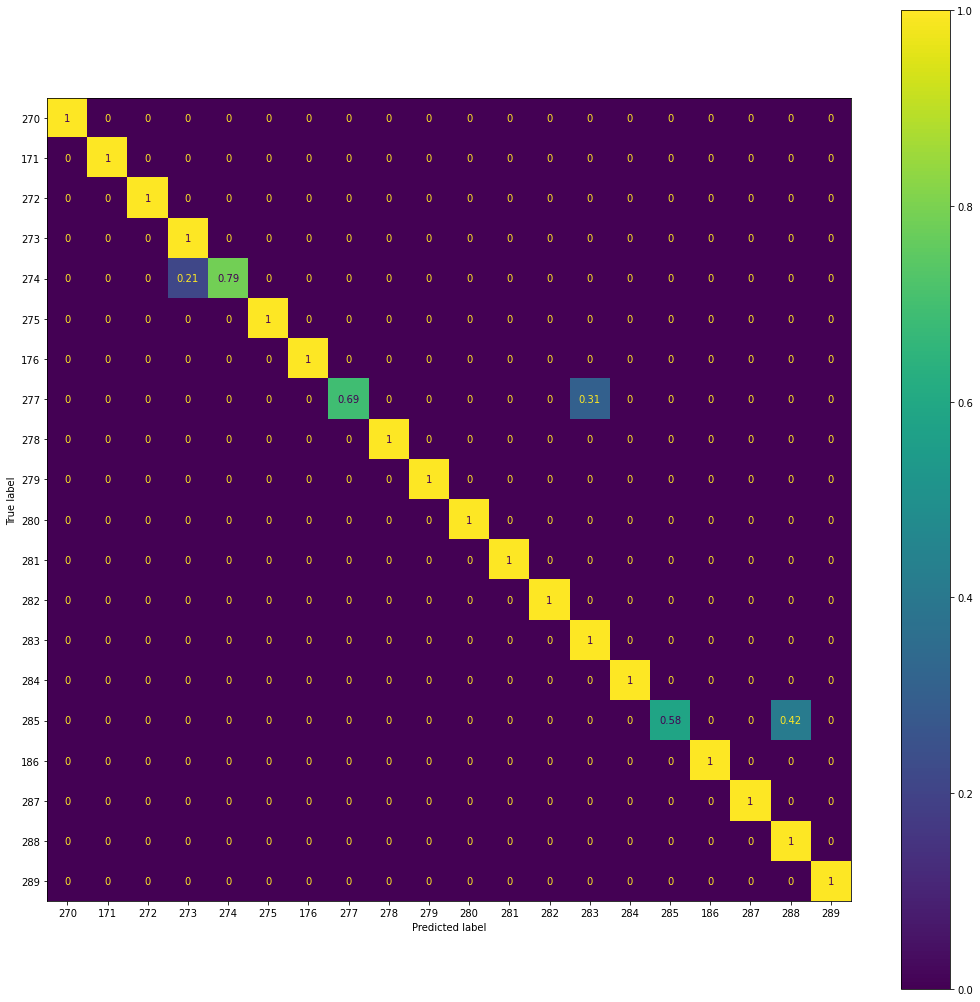

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

dict_error = {}
dict_nb = {}

conf_gold_label = None
conf_pred_label = None

with torch.no_grad():
  best_accuracy = 0
  mean_accuracies = []
  topk_accuracies = []
  min_accuracies = []
  final_mean_accuracies = []
  final_min_accuracies = []
  # Confusion matrix
  conf_gold_label = []
  conf_pred_label = []

  for epoch_num in range(EPOCH_NUM):
    print("*** Epoch ", epoch_num, " ***")
    # train
    print("*** Train ***")
    mean_accuracy = 0
    topk_accuracy = 0
    min_accuracy = 0
    nb_test = 0

    for speaker in speakers_list:
      id = speaker[0]
      dict_error[id] = 0
      dict_nb[id] = 0

    for iter_num, (gold_label, sample) in tqdm(enumerate(trainsetloader)):
      gold_label = gold_label.item()
      # Election day the network need to have the saple and the gold label
      mean_label, topk_label, min_label = net(sample, gold_label)

      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == mean_label:
        mean_accuracy += 1
      if gold_label == topk_label:
        topk_accuracy += 1
      else:
        dict_error[gold_label] += 1
      if gold_label == min_label:
        min_accuracy += 1

    mean_accuracy /= nb_test
    topk_accuracy /= nb_test
    min_accuracy /= nb_test
    mean_accuracies.append(mean_accuracy)
    topk_accuracies.append(topk_accuracy)
    min_accuracies.append(min_accuracy)
    print("accuracy mean ", mean_accuracy, "topk", topk_accuracy, 
          " min ", min_accuracy)
    add = 0
    nb = 0
    for id in dict_error:
      add += dict_error[id]
      nb += dict_nb[id]
      dict_error[id] =  100 * dict_error[id]//dict_nb[id] 
    print("Error ", add/nb)
    print(dict_error)
    
    # test
    print("*** Test ***")
    final_mean_accuracy = 0
    final_min_accuracy = 0
    nb_test = 0
    conf_gold_label.clear()
    conf_pred_label.clear()

    for iter_num, (gold_label, sample) in tqdm(enumerate(testsetloader)):
      gold_label = gold_label.item()
      # Speaker identification network need to have the sample and the place
      final_mean_label, final_min_label = net(sample, place_id=gold_label)
      conf_gold_label.append(gold_label)
      conf_pred_label.append(final_mean_label)      
      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == final_mean_label:
        final_mean_accuracy += 1
      if gold_label == final_min_label:
        final_min_accuracy += 1

    final_mean_accuracy /= nb_test
    final_min_accuracy /= nb_test
    final_mean_accuracies.append(final_mean_accuracy)
    final_min_accuracies.append(final_min_accuracy)
    print("accuracy final_mean ", final_mean_accuracy, 
          " final_min ", final_min_accuracy)

    cm = confusion_matrix(conf_gold_label, conf_pred_label, normalize='true')
    fig, ax = plt.subplots(figsize=(18, 18))
    disp = ConfusionMatrixDisplay(cm, [270, 171, 272, 273, 274, 275, 176, 277, 278, 279, 280, 281, 282, 283, 284, 285, 186, 287, 288, 289]).plot(ax=ax)
    plt.show()

  net.store_speakers(20, 3)

In [11]:
print("maximum of min", round(np.max(min_accuracies), 3))
print("maximum of topk", round(np.max(topk_accuracies), 3))
print("maximum of mean", round(np.max(mean_accuracies), 3))
print("maximum of final mean", round(np.max(final_mean_accuracies), 3))
print("maximum of final min", round(np.max(final_min_accuracies), 3))

maximum of min 0.756
maximum of topk 0.766
maximum of mean 0.724
maximum of final mean 0.988
maximum of final min 0.973


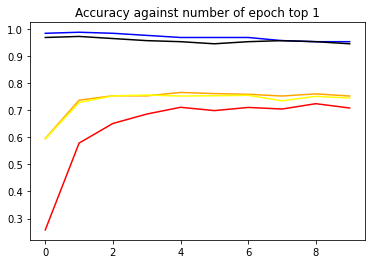

In [12]:
import matplotlib.pyplot as plt

plt.title("Accuracy against number of epoch top 1")
plt.plot([i for i in range(EPOCH_NUM)], mean_accuracies , label='test 1', color='red')
plt.plot([i for i in range(EPOCH_NUM)], topk_accuracies , label='test 1', color='orange')
plt.plot([i for i in range(EPOCH_NUM)], min_accuracies , label='test 1', color='yellow')
plt.plot([i for i in range(EPOCH_NUM)], final_mean_accuracies , label='test 1', color='blue')
plt.plot([i for i in range(EPOCH_NUM)], final_min_accuracies , label='test 1', color='black')

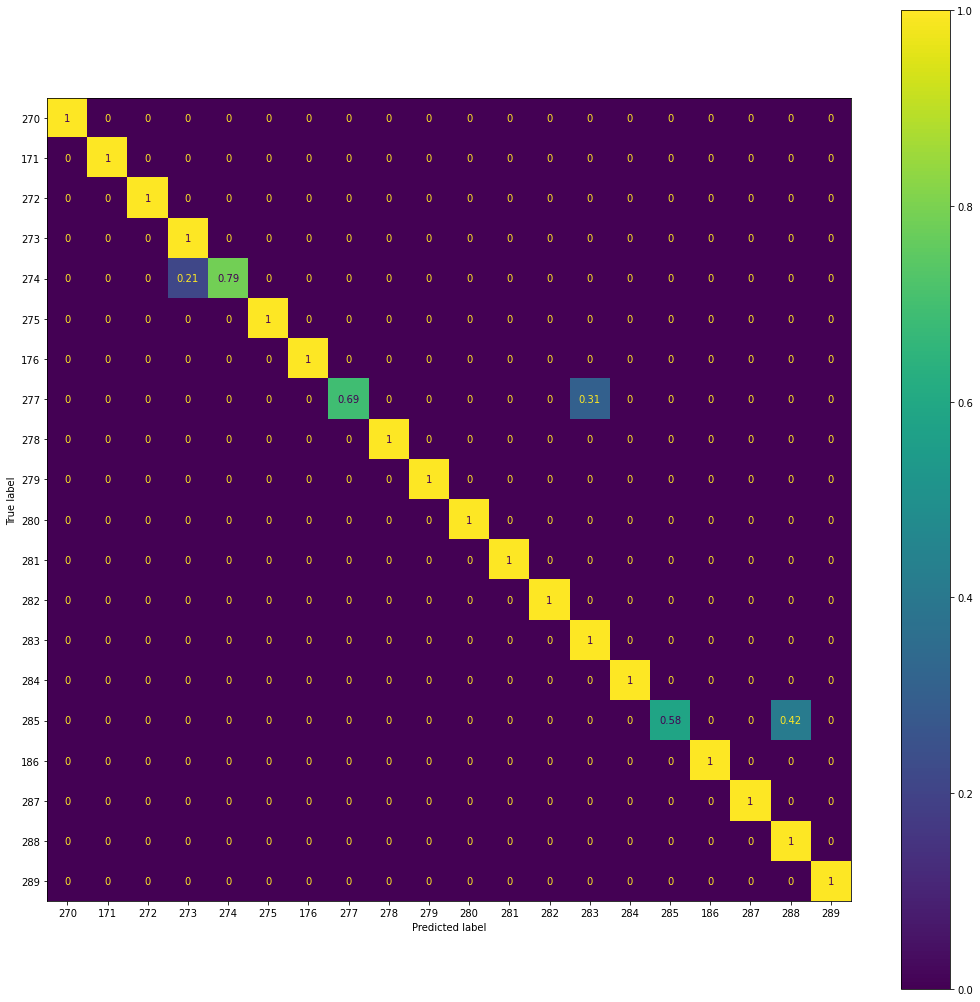

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(conf_gold_label, conf_pred_label, normalize='true')
fig, ax = plt.subplots(figsize=(18, 18))
disp = ConfusionMatrixDisplay(cm, [270, 171, 272, 273, 274, 275, 176, 277, 278, 279, 280, 281, 282, 283, 284, 285, 186, 287, 288, 289]).plot(ax=ax)
plt.show()